In [42]:
import os
import re
import csv
from datetime import datetime
import smtplib
from email.mime.text import MIMEText
import subprocess
from subprocess import check_output
import matplotlib.pyplot as plt
import pandas as pd
import time
import hashlib
import numpy as np

def extract_values(input_list):
    numeric_values = []
    converted_values = []

    for value_with_unit in input_list:
        match = re.match(r'(\d+\.\d+|\d+)(\w+)/s', value_with_unit)
        if match:
            numeric_value = float(match.group(1))
            unit = match.group(2)

            if unit == 'kB':
                numeric_value /= 1000  # Convert KiB to MiB

            numeric_values.append(numeric_value)
            converted_values.append(f'{numeric_value}MB/s')

    return numeric_values

# def condition_generator(bs, qd, cs, pt, dt):
#     conditions_lsvd_ssd_rr = (
#         (df['pool_type'] == pt) & 
#         (df['disk_type'] == dt) & 
#         (df['cache_size'] == cs) & 
#         (df['workload'] == 'randread') &
#         (df['bs'] == bs) &
#         (df['iodepth']==qd)
#     )
    
#     conditions_lsvd_ssd_rw = (
#         (df['pool_type'] == pt) & 
#         (df['disk_type'] == dt) & 
#         (df['cache_size'] == cs) & 
#         (df['workload'] == 'randwrite') &
#         (df['bs'] == bs) &
#         (df['iodepth']==qd)
#     )
    
#     conditions_lsvd_ssd_sr = (
#         (df['pool_type'] == pt) & 
#         (df['disk_type'] == dt) & 
#         (df['cache_size'] == cs) & 
#         (df['workload'] == 'read') &
#         (df['bs'] == bs) &
#         (df['iodepth']==qd)
#     )
    
#     conditions_lsvd_ssd_sw = (
#         (df['pool_type'] == pt) & 
#         (df['disk_type'] == dt) & 
#         (df['cache_size'] == cs) & 
#         (df['workload'] == 'write') &
#         (df['bs'] == bs) &
#         (df['iodepth']==qd)
#     )
#     return conditions_lsvd_ssd_rr, conditions_lsvd_ssd_rw, conditions_lsvd_ssd_sr, conditions_lsvd_ssd_sw

df = pd.read_csv("single_fio.csv")

lsvd_240gb_ssd_rr_avglat=[]
lsvd_240gb_ssd_rr_95lat=[]
lsvd_240gb_ssd_rr_99lat=[]

rbd_ssd_rr_avglat=[]
rbd_ssd_rr_95lat=[]
rbd_ssd_rr_99lat=[]

In [43]:
queueList= [1, 16, 32, 64, 80, 96, 112, 128, 160, 192, 224, 256, 320, 384, 448, 512]

for value in queueList:
    bs='4ki'
    qd= value
    cs='240gb'
    pt='ssd'
    dt='lsvd'
    
    conditions_240gb_lsvd_ssd_rr = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'randread') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    
    dt='rbd'
    cs='none'
    conditions_rbd_ssd_rr = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'randread') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )


    clat_240gb_lsvd_ssd_rr=df[conditions_240gb_lsvd_ssd_rr]
    clat_240gb_lsvd_ssd_rr_avglat=clat_240gb_lsvd_ssd_rr['clat_avg'].iloc[0]
    lsvd_240gb_ssd_rr_avglat.append(clat_240gb_lsvd_ssd_rr_avglat)
    # lsvd_240gb_ssd_rr1=extract_values(lsvd_240gb_ssd_rr)

    clat_240gb_lsvd_ssd_rr=df[conditions_240gb_lsvd_ssd_rr]
    clat_240gb_lsvd_ssd_rr_95lat=clat_240gb_lsvd_ssd_rr['clat_90th'].iloc[0]
    lsvd_240gb_ssd_rr_95lat.append(clat_240gb_lsvd_ssd_rr_95lat)
    # lsvd_240gb_ssd_rr1=extract_values(lsvd_240gb_ssd_rr)

    clat_240gb_lsvd_ssd_rr=df[conditions_240gb_lsvd_ssd_rr]
    clat_240gb_lsvd_ssd_rr_99lat=clat_240gb_lsvd_ssd_rr['clat_99th'].iloc[0]
    lsvd_240gb_ssd_rr_99lat.append(clat_240gb_lsvd_ssd_rr_99lat)
    # lsvd_240gb_ssd_rr1=extract_values(lsvd_240gb_ssd_rr)

    clat_rbd_ssd_rr=df[conditions_rbd_ssd_rr]
    clat_rbd_ssd_rr_avglat=clat_rbd_ssd_rr['clat_avg'].iloc[0]
    rbd_ssd_rr_avglat.append(clat_rbd_ssd_rr_avglat)
    # rbd_ssd_rr1=extract_values(rbd_ssd_rr)

    clat_rbd_ssd_rr=df[conditions_rbd_ssd_rr]
    clat_rbd_ssd_rr_95lat=clat_rbd_ssd_rr['clat_90th'].iloc[0]
    rbd_ssd_rr_95lat.append(clat_rbd_ssd_rr_95lat)
    # rbd_ssd_rr1=extract_values(rbd_ssd_rr)

    clat_rbd_ssd_rr=df[conditions_rbd_ssd_rr]
    clat_rbd_ssd_rr_99lat=clat_rbd_ssd_rr['clat_99th'].iloc[0]
    rbd_ssd_rr_99lat.append(clat_rbd_ssd_rr_99lat)
    # rbd_ssd_rr1=extract_values(rbd_ssd_rr)
    
    

In [44]:
print(rbd_ssd_rr_avglat)

[1617.58, 886.49, 1002.17, 1342.11, 1833.37, 1974.72, 2145.63, 2104.29, 3480.17, 3744.4, 3943.19, 4312.51, 7177.86, 7469.59, 7768.41, 8655.07]


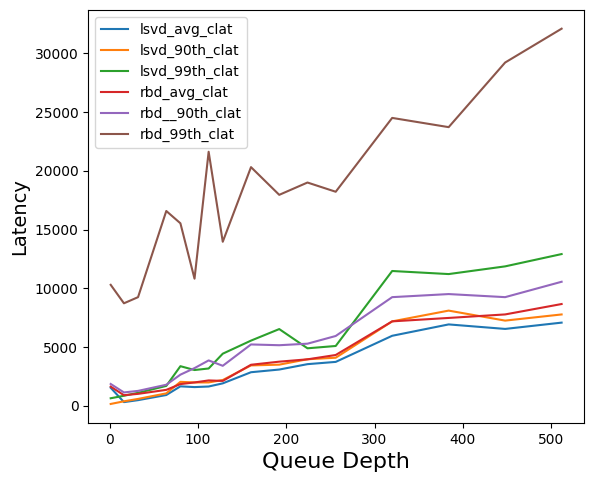

In [46]:
plt.plot(queueList, lsvd_240gb_ssd_rr_avglat, label = "lsvd_avg_clat" )
plt.plot(queueList, lsvd_240gb_ssd_rr_95lat, label = "lsvd_90th_clat" )
plt.plot(queueList, lsvd_240gb_ssd_rr_99lat, label = "lsvd_99th_clat" )
plt.plot(queueList, rbd_ssd_rr_avglat, label = "rbd_avg_clat" )
plt.plot(queueList, rbd_ssd_rr_95lat, label = "rbd__90th_clat" )
plt.plot(queueList, rbd_ssd_rr_99lat , label = "rbd_99th_clat" )
plt.xlabel('Queue Depth', fontweight ='normal', fontsize = 16) 
plt.ylabel('Latency', fontweight ='normal', fontsize = 14)
# plt.xticks(queueList)
description = f"Latency for random read with varying queue depth. SSD Backend, 80GB volume, 240GB cache, 4K blocksize"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.legend() 
# plt.ylim(0, 400)
plt.savefig('request_latency_qd_rr.png')
plt.subplots_adjust(bottom=0.02) 
plt.show()